In [17]:
using CairoMakie, LsqFit, CSV, DataFrames

In [33]:
csv1 = "/Volumes/SJYData/spectrum_analyzer_202507copy/v03/results/20241016_182839_spec.txt"
data1 = DataFrame(CSV.File(open(csv1); header = 10, delim=", "))#, skipto=11)

Row,MainBkg,Main,SubBkg,Sub
,Float64,Float64,Float64,Float64
1,4130.35,4439.46,5655.25,5600.41
2,4130.35,4439.46,5655.25,5600.41
3,4130.35,4439.46,5655.25,5600.41
4,4130.35,4439.46,4524.86,4492.88
5,3161.28,3470.55,4033.03,4003.51
6,2810.54,3122.97,3668.37,3644.44
7,2550.45,2870.28,3383.56,3375.01
8,2340.89,2662.49,3138.5,3133.45
9,2170.77,2491.1,2931.17,2940.87


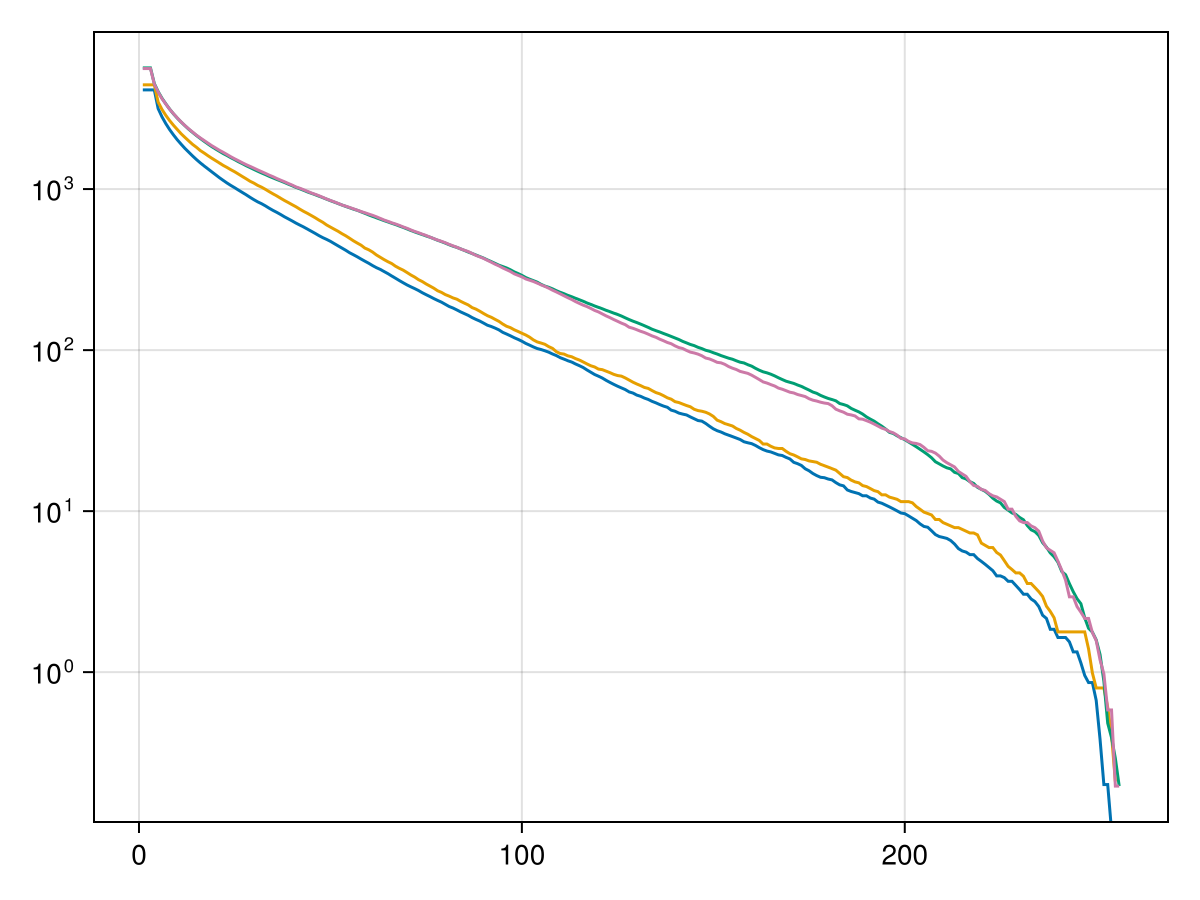

In [39]:
fig = Figure()
ax = Axis(fig[1, 1], yscale=log10)
channel = 1:length(data1.MainBkg)
lines!(ax, channel, data1.MainBkg)
lines!(ax, channel, data1[!, "Main"])
lines!(ax, channel, data1[!, "SubBkg"])
lines!(ax, channel, data1[!, "Sub"])

fig

In [44]:
isotope_files = Dict(
    "Am241Main" => "/Volumes/SJYData/spectrum_analyzer_202507copy/v03/isotope_data/kwangyang_20241111/P1/PN1_sn1174_HV1600_Gain-4.0_20s_Am241(90uCi)-100cm.mca",
    "BkgMain" => "/Volumes/SJYData/spectrum_analyzer_202507copy/v03/isotope_data/kwangyang_20241111/P1/PN1_sn1174_HV1600_Gain-4.0_20s_BKG.mca",
    "Co60Main" => "/Volumes/SJYData/spectrum_analyzer_202507copy/v03/isotope_data/kwangyang_20241111/P1/PN1_sn1174_HV1600_Gain-4.0_20s_Co60(9uCi)-100cm.mca",
    "Cs137Main" => "/Volumes/SJYData/spectrum_analyzer_202507copy/v03/isotope_data/kwangyang_20241111/P1/PN1_sn1174_HV1600_Gain-4.0_20s_Cs137(16uCi)-100cm.mca",
    "Am241Sub" => "/Volumes/SJYData/spectrum_analyzer_202507copy/v03/isotope_data/kwangyang_20241111/P2/PN2_sn1215_HV1425_Gain-4.0_20s_Am241(90uCi)-100cm.mca",
    "BkgSub" => "/Volumes/SJYData/spectrum_analyzer_202507copy/v03/isotope_data/kwangyang_20241111/P2/PN2_sn1215_HV1425_Gain-4.0_20s_BKG.mca",
    "Co60Sub" => "/Volumes/SJYData/spectrum_analyzer_202507copy/v03/isotope_data/kwangyang_20241111/P2/PN2_sn1215_HV1425_Gain-4.0_20s_Co60(9uCi)-100cm.mca",
    "Cs137Sub" => "/Volumes/SJYData/spectrum_analyzer_202507copy/v03/isotope_data/kwangyang_20241111/P2/PN2_sn1215_HV1425_Gain-4.0_20s_Cs137(16uCi)-100cm.mca"
)


Dict{String, String} with 8 entries:
  "Cs137Sub"  => "/Volumes/SJYData/spectrum_analyzer_202507copy/v03/isotope_dat…
  "Co60Main"  => "/Volumes/SJYData/spectrum_analyzer_202507copy/v03/isotope_dat…
  "Am241Main" => "/Volumes/SJYData/spectrum_analyzer_202507copy/v03/isotope_dat…
  "Cs137Main" => "/Volumes/SJYData/spectrum_analyzer_202507copy/v03/isotope_dat…
  "BkgSub"    => "/Volumes/SJYData/spectrum_analyzer_202507copy/v03/isotope_dat…
  "BkgMain"   => "/Volumes/SJYData/spectrum_analyzer_202507copy/v03/isotope_dat…
  "Co60Sub"   => "/Volumes/SJYData/spectrum_analyzer_202507copy/v03/isotope_dat…
  "Am241Sub"  => "/Volumes/SJYData/spectrum_analyzer_202507copy/v03/isotope_dat…

In [45]:
open(isotope_files["Am241Main"], "r") 

IOStream(<file /Volumes/SJYData/spectrum_analyzer_202507copy/v03/isotope_data/kwangyang_20241111/P1/PN1_sn1174_HV1600_Gain-4.0_20s_Am241(90uCi)-100cm.mca>)